In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
df.shape

(891, 25)

### segregating the independent and dependent variables

In [7]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x.shape,y.shape

((891, 24), (891,))

In [8]:
# here we will scale the features as most distance learning algorithms work only when they have values between 0 and 1 
# and for that purpose we will use the MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

x=pd.DataFrame(x_scaled,columns=x.columns)

In [10]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**so there we go,after scaling we can see all our values lie between 0 and 1**

In [13]:
#Now we will divide our entire dataset into training and testing dataframes.
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,stratify=y)
#Here what stratify does is make sure that the distribution of our target class in train and test is equal

### Implementing KNN CLassifier

In [14]:
#import sklearn and other metrics like the f1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [15]:
clf=KNN(n_neighbors=5)
clf.fit(train_x,train_y)
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test F1 score',k)

Test F1 score 0.6826347305389222


In [16]:
#here we get a f1_score with neighbors=5
#we can change this value and see how much it affects our final f1_score

In [19]:
clf=KNN(n_neighbors=10)
clf.fit(train_x,train_y)
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test F1 score',k)

Test F1 score 0.6887417218543046


In [21]:
#There is some sight improvement in our score 
#But doing this manually is a tiring task so we will use the Elbow Method for selecting the right value of k

In [41]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [42]:
K=range(6,20,2)

In [43]:
test=Elbow(K)

Text(0.5,1,'Elbow Curve for test')

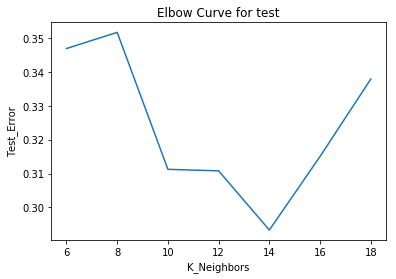

In [44]:
plt.plot(k, test)
plt.xlabel('K_Neighbors')
plt.ylabel('Test_Error')
plt.title('Elbow Curve for test')

In [45]:
#here we can see that the lowest value is 14,so lets train our classifier on 14 and see what we get 

In [48]:
clf=KNN(n_neighbors=14)
clf.fit(train_x,train_y)
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test F1_score',k)

Test F1_score 0.7066666666666667
